In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
plt.style.use('science')

We will be looking at the integrate and fire model firing frequency as we tune parameters to see how they change over time. 

In the integrate and fire model, we have some signal increase with some slope $s_1$ until it reaches an oscillating threshold 

$$\theta (t) = 1 + k \sin(2 \pi t)$$

then it decreases with a slope of $-s_2$ until it reaches zero. Then it repeats the cycle. 

---

If we let $t_n$ be the $n$th time that the threahold is reached, then we have thee following

$$ t_{n+1} = t_n + \frac{1}{s_2} + \frac{k}{s_2} \sin(2 \pi t_n) $$

Using this equation, we can calculate and plot the activation times using the simple method below. 

In [2]:
# Use an generator function to generate the activation times on the fly. 
def integrate_and_fire(duration_cutoff, s_2, k, starting_time):
    t = starting_time 
    while(t < duration_cutoff): 
        yield t 
        t = t + (1/s_2) + (k/s_2) * np.sin(2 * np.pi * t)

In [3]:
# This should print a list of the times that the activation threshold was reached. 
list(integrate_and_fire(duration_cutoff=10.0, s_2=np.pi, k=0.3, starting_time=1.0))

[1.0,
 1.3183098861837907,
 1.7234512804996105,
 1.9475937046979497,
 2.235024952869609,
 2.6484054115409412,
 2.89002609894896,
 3.147478544414276,
 3.5421449602713997,
 3.835462362554229,
 4.071719003406082,
 4.431618667703015,
 4.789706624994646,
 5.015480013970578,
 5.343063270988027,
 5.74100083235247,
 5.963970365177287,
 6.260846643656131,
 6.674427817096519,
 6.907809256573859,
 7.173846511775714,
 7.5769248180498305,
 7.850855985221505,
 8.092213436376097,
 8.46280734767522,
 8.803230269182746,
 9.031338537182203,
 9.368330275518678,
 9.756933497552643,
 9.979841019752921]

In [4]:
# Now we can plot the values as we tune the parameter such as s_2. 
X = []
Y = []
for s_2 in tqdm(np.linspace(1.0, 3.0, num=40)): 
    y = list(integrate_and_fire(duration_cutoff=10.0, s_2=s_2, k=0.3, starting_time=1.0))
    X = X + [s_2 for _ in range(len(y))]
    Y = Y + y

  0%|          | 0/40 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Activation Times for Varying $s_2$ Values')

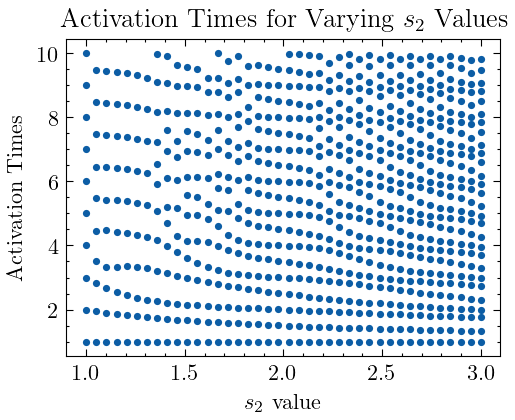

In [5]:
plt.figure(dpi=160)
plt.scatter(X, Y, s=5)
plt.xlabel('$s_2$ value')
plt.ylabel('Activation Times')
plt.title('Activation Times for Varying $s_2$ Values')

In [6]:
# Now, we can try to vary other parameters, lets do k next. 
X = []
Y = []
for k in tqdm(np.linspace(0.1, 0.9, num=40)): 
    y = list(integrate_and_fire(duration_cutoff=20.0, s_2=0.512, k=k, starting_time=0.1))
    X = X + [k for _ in range(len(y))]
    Y = Y + y

  0%|          | 0/40 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Activation Times for Varying $k$ Values')

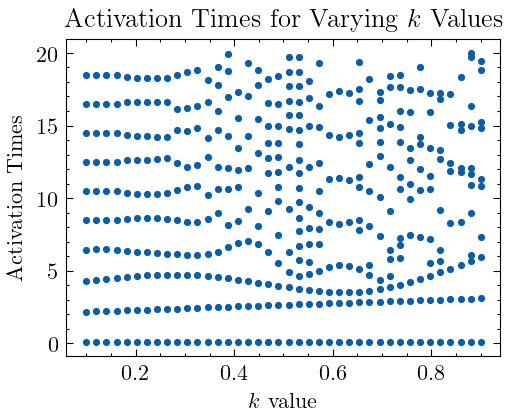

In [7]:
plt.figure(dpi=160)
plt.scatter(X, Y, s=5)
plt.xlabel('$k$ value')
plt.ylabel('Activation Times')
plt.title('Activation Times for Varying $k$ Values')

Very interesting dynamics at $k \approx \pi$ :) It seems to break down a bit and we get some negitive values.

In [8]:
# Now we can do the starting point, which will change the value of s_1 for the system. 
X = []
Y = []
for starting_time in tqdm(np.linspace(0.1, 5.0, num=40)): 
    y = list(integrate_and_fire(duration_cutoff=40.0, s_2=0.512, k=0.3, starting_time=starting_time))
    X = X + [starting_time for _ in range(len(y))]
    Y = Y + y

  0%|          | 0/40 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Activation Times for Varying Starting Time')

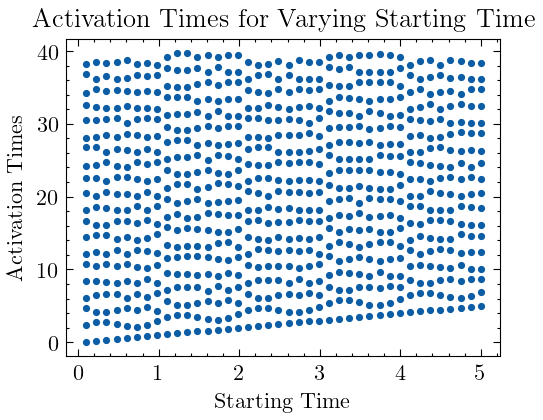

In [9]:
plt.figure(dpi=160)
plt.scatter(X, Y, s=5)
plt.xlabel('Starting Time')
plt.ylabel('Activation Times')
plt.title('Activation Times for Varying Starting Time')